# A Simple Autoencoder

In [2]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent','Mozilla/5.0')]
urllib.request.install_opener(opener)

In [3]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

transform = transforms.ToTensor()
train_data = datasets.MNIST(root='~/.pytorch/MNIST_data/', 
                            train=True, download=True, transform = transform)
test_data = datasets.MNIST(root='~/.pytorch/MNIST_data/',
                           train=False, download=True, transform=transform)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /home/bish/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /home/bish/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /home/bish/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /home/bish/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /home/bish/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/bish/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /home/bish/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/bish/.pytorch/MNIST_data/MNIST/raw



In [7]:
num_workers = 0
batch_size = 20

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, num_workers = num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, num_workers = num_workers)

# Visualize the Data

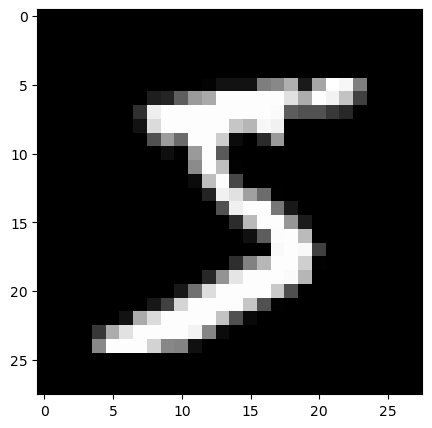

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()
# print(images)
img = np.squeeze(images[0])
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

# Linear AutoEncoder

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        self.fc1 = nn.Linear(28*28, encoding_dim)
        self.fc2 = nn.Linear(encoding_dim, 28*28)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        return x
    
encoding_dim = 64
model = Autoencoder(encoding_dim)
print(model)

Autoencoder(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=784, bias=True)
)


# Training Our Model

In [13]:
n_epochs = 35
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(1, n_epochs+1):
    train_loss = 0.0
    
    for data in train_loader:
        images,_ = data
        images = images.view(images.size(0), -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
    
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:6f}'.format(
            epoch, train_loss
    ))

Epoch: 1 	Training Loss: 0.472968
Epoch: 2 	Training Loss: 0.155575
Epoch: 3 	Training Loss: 0.124558
Epoch: 4 	Training Loss: 0.117283
Epoch: 5 	Training Loss: 0.113869
Epoch: 6 	Training Loss: 0.111623
Epoch: 7 	Training Loss: 0.109944
Epoch: 8 	Training Loss: 0.108787
Epoch: 9 	Training Loss: 0.107979
Epoch: 10 	Training Loss: 0.107350
Epoch: 11 	Training Loss: 0.106830
Epoch: 12 	Training Loss: 0.106374
Epoch: 13 	Training Loss: 0.105976
Epoch: 14 	Training Loss: 0.105630
Epoch: 15 	Training Loss: 0.105341
Epoch: 16 	Training Loss: 0.105097
Epoch: 17 	Training Loss: 0.104883
Epoch: 18 	Training Loss: 0.104693
Epoch: 19 	Training Loss: 0.104519
Epoch: 20 	Training Loss: 0.104361
Epoch: 21 	Training Loss: 0.104219
Epoch: 22 	Training Loss: 0.104086
Epoch: 23 	Training Loss: 0.103960
Epoch: 24 	Training Loss: 0.103845
Epoch: 25 	Training Loss: 0.103735
Epoch: 26 	Training Loss: 0.103633
Epoch: 27 	Training Loss: 0.103540
Epoch: 28 	Training Loss: 0.103451
Epoch: 29 	Training Loss: 0.1

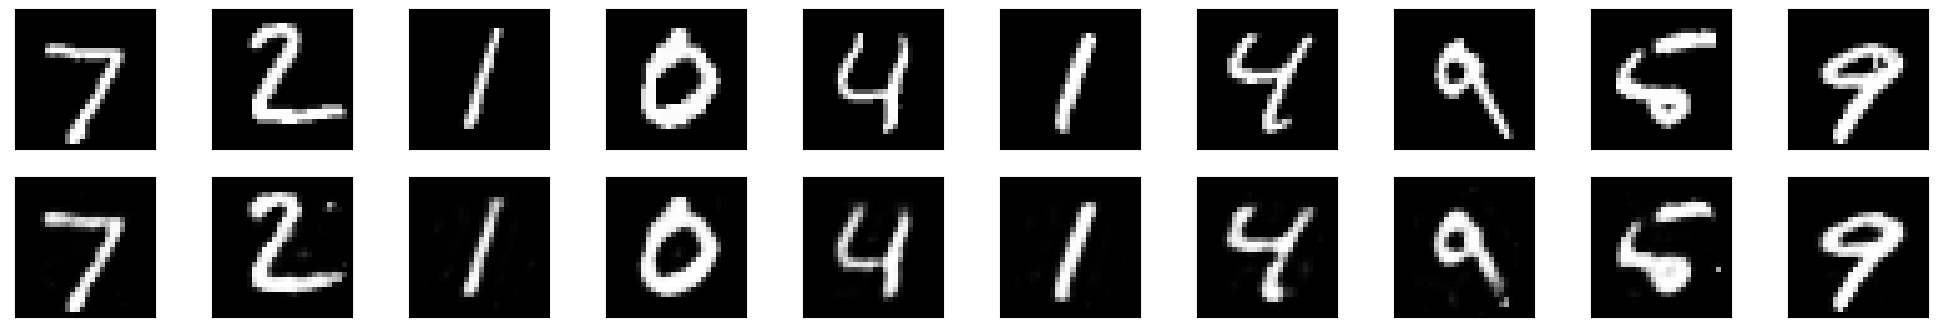

In [14]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

images_flatten = images.view(images.size(0), -1)
output = model(images_flatten)
images = images.numpy()

output = output.view(batch_size, 1, 28, 28)
output = output.detach().numpy()

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey = True, figsize = (25,4) )

for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)